In [10]:
#  Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

___
Enter Team Member Names here (double click to edit):

# DJ Dawkins, Rick Fontenot, Joe Lazarus, Puri Rudick

________

# In Class Assignment Three
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (or HTML of the rendered notebook)  before the end of class.

<a id="top"></a>
## Contents
* <a href="#Loading">Loading the Data</a>
* <a href="#distance">Measuring Distances</a>
* <a href="#KNN">K-Nearest Neighbors</a>
* <a href="#naive">Naive Bayes</a>

________________________________________________________________________________________________________
<a id="Loading"></a>
<a href="#top">Back to Top</a>
## Downloading the Document Data
Please run the following code to read in the "20 newsgroups" dataset from sklearn's data loading module.

In [1]:
from sklearn.datasets import fetch_20newsgroups_vectorized
import numpy as np
from __future__ import print_function

# this takes about 30 seconds to compute, read the next section while this downloads
ds = fetch_20newsgroups_vectorized(subset='train')

# this holds the continuous feature data (which is tfidf)
print('features shape:', ds.data.shape) # there are ~11000 instances and ~130k features per instance
print('target shape:', ds.target.shape) 
print('range of target:', np.min(ds.target),np.max(ds.target))
print('Data type is', type(ds.data), float(ds.data.nnz)/(ds.data.shape[0]*ds.data.shape[1])*100, '% of the data is non-zero')

features shape: (11314, 130107)
target shape: (11314,)
range of target: 0 19
Data type is <class 'scipy.sparse.csr.csr_matrix'> 0.1214353154362896 % of the data is non-zero


## Understanding the Dataset
Look at the description for the 20 newsgroups dataset at http://qwone.com/~jason/20Newsgroups/. You have just downloaded the "vectorized" version of the dataset, which means all the words inside the articles have gone through a transformation that binned them into 130 thousand features related to the words in them.  

**Question Set 1**:
- How many instances are in the dataset? 
- What does each instance represent? 
- How many classes are in the dataset and what does each class represent?
- Would you expect a classifier trained on this data would generalize to documents written in the past week? Why or why not?
- Is the data represented as a sparse or dense matrix?

___
Enter your answer here:


* ## There are 11,314 instances
<p></p>

* ## Each instance represents an article: "Each newsgroup is stored in a subdirectory, with each article stored as a separate file." from http://kdd.ics.uci.edu/databases/20newsgroups/20newsgroups.data.html
<p></p>

* ## There are 20 classes (values 0..19) as shown in print code chunk above. Each Class represents one of the newsgroups listed here: http://kdd.ics.uci.edu/databases/20newsgroups/20newsgroups.data.html
<p></p>

* ## No, this dataset is from 1997 and too much has changed since then. Some of the groups are about computer hardware and names and specifications exists today that were not available at the time of this dataset. The same would be true for names, topics and even new words in the groups for sports, politics, and science
<p></p>

* ## This data is sparse as the data type printout above specifies. Only 0.12% of the data is non-zero 







___
<a id="distance"></a>
<a href="#top">Back to Top</a>
## Measures of Distance
In the following block of code, we isolate three instances from the dataset. The instance "`a`" is from the group *computer graphics*, "`b`" is from from the group *recreation autos*, and "`c`" is from group *recreation motorcycle*. **Exercise for part 2**: Calculate the: 
- (1) Euclidean distance
- (2) Cosine distance 
- (3) Jaccard similarity 

between each pair of instances using the imported functions below. Remember that the Jaccard similarity is only for binary valued vectors, so convert vectors to binary using a threshold. 

**Question for part 2**: Which distance seems more appropriate to use for this data? **Why**?

In [2]:
from scipy.spatial.distance import cosine
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import jaccard
import numpy as np

# get first instance (comp)
idx = 550
a = ds.data[idx].todense()
a_class = ds.target_names[ds.target[idx]]
print('Instance A is from class', a_class)

# get second instance (autos)
idx = 4000
b = ds.data[idx].todense()
b_class = ds.target_names[ds.target[idx]]
print('Instance B is from class', b_class)

# get third instance (motorcycle)
idx = 7000
c = ds.data[idx].todense()
c_class = ds.target_names[ds.target[idx]]
print('Instance C is from class', c_class)

# Enter distance comparison below for each pair of vectors:
p = 'Placeholder'
print('\n\nEuclidean Distance\n ab:', euclidean(a,b), 'ac:', euclidean(a,c), 'bc:',euclidean(b,c))
print('Cosine Distance\n ab:', cosine(a,b), 'ac:', cosine(a,c), 'bc:', cosine(b,c))
print('Jaccard Dissimilarity (vectors should be boolean values)\n ab:', jaccard(a>0,b>0), 'ac:', jaccard(a>0,c>0), 'bc:', jaccard(b>0,c>0))

print('\n\nThe most appropriate distance is Cosine. Intuitively you would expect autos(b) and motorcycles(c) to be more similar to each other than computer graphics.')
print('Euclidean doesn''t show much sepration in distance between the groups, Jaccard actually shows the longest distance is between b & c, Cosine shows the shortest distance between b-c and separation from other pairs.')
print('Euclidean is greatly impacted by the scale of variables and with this sparse data set there are issues scaling. Cosine and Jaccard are both often used in text classifications. Jaccard can be influenced by the size of large data sets.')
print('https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa')


Instance A is from class comp.graphics
Instance B is from class rec.autos
Instance C is from class rec.motorcycles


Euclidean Distance
 ab: 1.0985184671870858 ac: 1.1891405425398234 bc: 0.9177794226661624
Cosine Distance
 ab: 0.6033714113755322 ac: 0.7070276149559529 bc: 0.4211595343347173
Jaccard Dissimilarity (vectors should be boolean values)
 ab: 0.8821138211382114 ac: 0.8754716981132076 bc: 0.9087947882736156


The most appropriate distance is Cosine. Intuitively you would expect autos(b) and motorcycles(c) to be more similar to each other than computer graphics.
Euclidean doesnt show much sepration in distance between the groups, Jaccard actually shows the longest distance is between b & c, Cosine shows the shortest distance between b-c and separation from other pairs.
Euclidean is greatly impacted by the scale of variables and with this sparse data set there are issues scaling. Cosine and Jaccard are both often used in text classifications. Jaccard can be influenced by the size

___
# Start of Live Session Assignment
___
<a id="KNN"></a>
<a href="#top">Back to Top</a>
## Using scikit-learn with KNN
Now let's use stratified cross validation with a holdout set to train a KNN model in `scikit-learn`. Use the example below to train a KNN classifier. The documentation for `KNeighborsClassifier` is here: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html  

**Exercise for part 3**: Use the code below to test what value of `n_neighbors` works best for the given data. *Note: do NOT change the metric to be anything other than `'euclidean'`. Other distance functions are not optimized for the amount of data we are working with.* 

**Question for part 3**: What is the accuracy of the best classifier you can create for this data (by changing only the `n_neighbors` parameter)? 

# Run Base KNN model with k=5 neighbor as starting point for comparison

In [10]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt


# create variables we are more familiar with
X = ds.data
y = ds.target
yhat = np.zeros(y.shape) # we will fill this with predictions

#Scaling may not be working right with sparse data, much lower accuracy
#scl = StandardScaler(with_mean=False) #with_mean=False needed for sparse matrix
#X = scl.fit_transform(X)

# create cross validation iterator
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


# get a handle to the classifier object, which defines the type
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
for train, test in cv.split(X,y):
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
print ('KNN Mean accuracy for 10 folds: ', total_accuracy)

KNN Mean accuracy for 10 folds:  0.6042071769489129
CPU times: user 7.57 s, sys: 203 ms, total: 7.78 s
Wall time: 8.1 s


# Run Grid Search to find optimal k within range of 1 to 30

In [5]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier(n_neighbors=5)

k_range = list(range(1, 31))

param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

Best Accuracy:  0.7067365882158133
Best Parameters from search:  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}


Text(0, 0.5, 'Cross-Validated Accuracy')

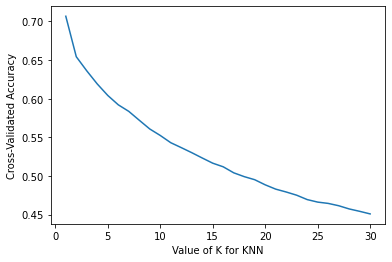

In [9]:
print("Best Accuracy: ",grid.best_score_)
print("Best Parameters from search: ",grid.best_estimator_.get_params())


from matplotlib import pyplot as plt

plt.plot(k_range, grid.cv_results_['mean_test_score'])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# Question 3(a): The best accuracy is 70.67% with 1 neighbors.

# Question for part 3(b): With sparse data, does the use of a KDTree representation make sense? Why or Why not?
# No, KDTree doesn't make sense with a large sparse matrix since the large number of zeros would create excessively large/deep trees. Also with the large number of zeros in a sparse set the distance calculations are quick / low cost so using KDTree is not as beneficial.

_____
## KNN extensions - Centroids
Now lets look at a very closely related classifier to KNN, called nearest centroid. In this classifier (which is more appropriate for big data scenarios and sparse data), the training step is used to calculate the centroids for each class. These centroids are saved. Unknown attributes, at prediction time, only need to have distances calculated for each saved centroid, drastically decreasing the time required for a prediction. 

**Exercise for part 4**: Use the template code below to create a nearest centroid classifier. Test which metric has the best cross validated performance: Euclidean, Cosine, or Manhattan. In `scikit-learn` you can see the documentation for NearestCentroid here: 
- http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html#sklearn.neighbors.NearestCentroid

and for supported distance metrics here:
- http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics

**We used 10-fold CV and compare mean accuracy**

In [22]:
from sklearn.neighbors import NearestCentroid

# the parameters for the nearest centroid metric to test are:
#    l1, l2, and cosine (all are optimized)

#clf = NearestCentroid(metric='euclidean')

import warnings

warnings.filterwarnings("ignore")


# fill in your code here
for d in ['l1','l2','cosine']:
    clf = NearestCentroid(metric=d)
    for train, test in cv.split(X,y):
        clf.fit(X[train],y[train])
        yhat[test] = clf.predict(X[test])
    total_accuracy = mt.accuracy_score(y, yhat)
    print ('Metric: ',d,'KNN Mean accuracy for 10 folds: ', total_accuracy)

print('The best distance metric is: Cosine')

Metric:  l1 KNN Mean accuracy for 10 folds:  0.32146013788226974
Metric:  l2 KNN Mean accuracy for 10 folds:  0.41506098638854516
Metric:  cosine KNN Mean accuracy for 10 folds:  0.4940781332861941
The best distance metric is: Cosine


___
<a id="naive"></a>
<a href="#top">Back to Top</a>
## Naive Bayes Classification
Now let's look at the use of the Naive Bayes classifier. The 20 newsgroups dataset has 20 classes and about 130,000 features per instance. Recall that the Naive Bayes classifer calculates a posterior distribution for each possible class. Each posterior distribution is a multiplication of many conditional distributions: 

$${\arg \max}_{j} \left(p(class=j)\prod_{i} p(attribute=i|class=j) \right)$$

where $p(class=j)$ is the prior and $p(attribute=i|class=j)$ is the conditional probability.

**Question for part 5**: With this many classes and features, how many different conditional probabilities need to be parameterized? How many priors need to be parameterized?

Enter you answer here:

Calculations below

In [25]:
features = 130107
classes = 20
Total_Conditionals = features * classes
print('Total Conditionals =',Total_Conditionals)

priors = 1 * classes
print('Priors =',priors, ' (one per class)')



Total Conditionals = 2602140
Priors = 20  (one per class)


___
## Naive Bayes in Scikit-learn
Scikit has several implementations of the Naive Bayes classifier: `GaussianNB`, `MultinomialNB`, and `BernoulliNB`. Look at the documentation here: http://scikit-learn.org/stable/modules/naive_bayes.html Take a look at each implementation and then answer this question: 

**Questions for part 6**: 
- If the instances contain mostly continuous attributes, would it be better to use Gaussian Naive Bayes, Multinomial Naive Bayes, or Bernoulli? And Why? 
- What if the data is sparse, does this change your answer? Why or Why not?

**Answer:**
* Gaussian Naive Bayes is useful when working with continuous values which probabilities can be modeled using a Gaussian distribution. The conditional probabilities P(xi|y) are also Gaussian distributed and, therefore, it’s necessary to estimate mean and variance of each of them using the maximum likelihood approach. This quite easy, in fact, considering the property of a Gaussian [ref](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/)
* Sparse matrices are much harder to find realistic Gaussian models for because they always have a mean near zero.
* For sparse data, it is probably better (and faster) to use multinomial naive Bayes. 
* An argument can also be made for Bernoulli if binarizing the feature data helps to reduce the complexity of the problem.

## Naive Bayes Comparison
For the final section of this notebook let's compare the performance of Naive Bayes for document classification. Look at the parameters for `MultinomialNB`, and `BernoulliNB` (especially `alpha` and `binarize`). 

**Exercise for part 7**: Using the example code below, change the parameters for each classifier and see how accurate you can make the classifiers on the test set. 


**Question for part 7**: Why are these implementations so fast to train? What does the `'alpha'` value control in these models (*i.e.*, how does it change the parameterizations)? 

**Answer:**
* These classifiers are so fast because only the probability of each class and the probability of each class given different input (x) values need to be calculated. No coefficients need to be fitted by optimization procedures. [ref](https://stats.stackexchange.com/questions/33185/difference-between-naive-bayes-multinomial-naive-bayes)
* The alpha values control the smoothing technique. If one of the probabilities is zero then the entire expression becomes zero. The smoothing parameter allows you to have that probability be really small but non-zero
* An argument can also be made for Bernoulli if binarizing the feature data helps to reduce the complexity of the problem.


In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB


clf_mnb = MultinomialNB(alpha=1.0)
clf_bnb = BernoulliNB(alpha=1.0, binarize=0.0)

# fill in your code here
for train, test in cv.split(X,y):
    clf_mnb.fit(X[train],y[train])
    yhat[test] = clf_mnb.predict(X[test])
    
total_accuracy = mt.accuracy_score(y, yhat)
print ('MultinomialNB with alpha= 1.0',' Mean accuracy for 10 folds: ', total_accuracy)

for train, test in cv.split(X,y):
    clf_bnb.fit(X[train],y[train])
    yhat[test] = clf_bnb.predict(X[test])
    
total_accuracy = mt.accuracy_score(y, yhat)
print ('BernoulliNB with alpha= 1.0',' Mean accuracy for 10 folds: ', total_accuracy)
            


MultinomialNB with alpha= 1.0  Mean accuracy for 10 folds:  0.7675446349655294
BernoulliNB with alpha= 1.0  Mean accuracy for 10 folds:  0.6971893229627011
These classifiers are so fast because only the probability of each class and the probability of each class given different input (x) values need to be calculated. No coefficients need to be fitted by optimization procedures.
https://stats.stackexchange.com/questions/33185/difference-between-naive-bayes-multinomial-naive-bayes
The alpha values control the smoothing technique. If one of the probabilities is zero then the entire expression becomes zero. The smoothing parameter allows you to have that probability be really small but non-zero


In [40]:
alpha_range = list(np.arange(0, 1, 0.1))

param_grid = dict(alpha=alpha_range)

grid = GridSearchCV(clf_mnb, param_grid, cv=cv, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=MultinomialNB(),
             param_grid={'alpha': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                                   0.6000000000000001, 0.7000000000000001, 0.8,
                                   0.9]},
             scoring='accuracy')

Best Accuracy for MultinomialNB:  0.8967674561740603
Best Parameters for MultinomialNB from search:  {'alpha': 0.0, 'class_prior': None, 'fit_prior': True}


Text(0, 0.5, 'Cross-Validated Accuracy')

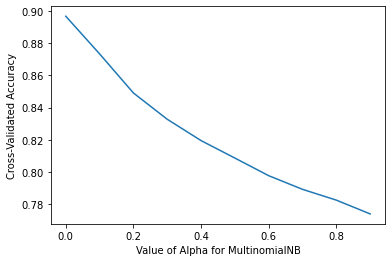

In [41]:
print("Best Accuracy for MultinomialNB: ",grid.best_score_)
print("Best Parameters for MultinomialNB from search: ",grid.best_estimator_.get_params())


from matplotlib import pyplot as plt

plt.plot(alpha_range, grid.cv_results_['mean_test_score'])
plt.xlabel('Value of Alpha for MultinomialNB')
plt.ylabel('Cross-Validated Accuracy')

In [42]:
param_grid2 = {
    'alpha': list(np.arange(0, 1, 0.1)),
    'binarize': [0,1]
}

grid = GridSearchCV(clf_bnb, param_grid2, cv=cv, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=BernoulliNB(),
             param_grid={'alpha': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                                   0.6000000000000001, 0.7000000000000001, 0.8,
                                   0.9],
                         'binarize': [0, 1]},
             scoring='accuracy')

In [43]:
print("Best Accuracy for BernoulliNB: ",grid.best_score_)
print("Best Parameters for BernoulliNB from search: ",grid.best_estimator_.get_params())


Best Accuracy for BernoulliNB:  0.8820072296007473
Best Parameters for BernoulliNB from search:  {'alpha': 0.0, 'binarize': 0, 'class_prior': None, 'fit_prior': True}


________________________________________________________________________________________________________

That's all! Please **upload your rendered notebook to blackboard** and please include **team member names** in the notebook submission.